In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import verify_gradients
import numpy as np
import pandas as pd
from prepare import prepare_data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# **A13**


**Creating moon dataset** 

In [ ]:
#Creating moon dataset
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=1000, shuffle=True, noise=0.05, random_state=156)
y_moons = ((2 * y_moons) - 1)[:, None] 
print(f"{X_moons.shape}, {y_moons.shape}") 
plt.figure(), plt.grid(alpha=0.5), plt.title("Synthetic moon dataset") 
_ = sns.scatterplot(x=X_moons[:, 0], y=X_moons[:, 1], hue=y_moons[:, 0])

# **A14**


**verify gradients**

In [ ]:
verify_gradients.compare_gradients(X_moons, y_moons, deltas=np.logspace(-9, -1, 12))

# **A15**


**SGD**

In [ ]:
clf = SoftSVM(C=1, lr=2e-4) 
losses, accuracies = clf.fit_with_logs(X_moons, y_moons, max_iter=3000) 
plt.figure(figsize=(13, 6)) 
plt.subplot(121), plt.grid(alpha=0.5), plt.title ("Loss") 
plt.semilogy(losses), plt.xlabel("itration"), plt.ylabel("loss") 
plt.subplot(122), plt.grid(alpha=0.5), plt.title ("Accuracy") 
plt.plot(accuracies), plt.xlabel("itration"), plt.ylabel("accuracy") 
plt.tight_layout()

# **A16**


**loading dataset**

In [4]:
#@title

def transform_labels(dataset):

    dataset['risk'].replace({1: 1, 0: -1}, inplace=True)
    dataset['spread'].replace({1: 1, 0: -1}, inplace=True)
    dataset['covid'].replace({1: 1, 0: -1}, inplace=True)

In [5]:
dataset = pd.read_csv("virus_data.csv")
transform_labels(dataset)
train_data, test_data= train_test_split(dataset, test_size=0.2, train_size=0.8, random_state=156)
test_data, train_data = prepare_data(test_data, train_data) 


c:\Users\alonz\Documents\GitHub\Intorduction-to-ML\Classifiers\prepare.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['risk','covid','spread']].replace({1: 1, 0: -1}, inplace=True)
c:\Users\alonz\Documents\GitHub\Intorduction-to-ML\Classifiers\prepare.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_data[symptom][index] = 1
c:\Users\alonz\Documents\GitHub\Intorduction-to-ML\Classifiers\prepare.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

Text(0.5, 0.98, "Marginal and joint distribution of PCR_05 and sugar_levels according to 'spread' label")

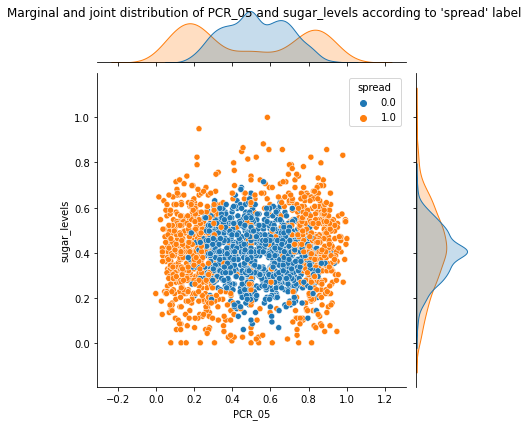

In [6]:
plot = sns.jointplot(data = train_data, x='PCR_05', y='sugar_levels', hue = 'spread')
plot.fig.suptitle("Marginal and joint distribution of PCR_05 and sugar_levels according to 'spread' label")

In [7]:
X_train = train_data[['PCR_05','sugar_levels']]
y_train = train_data['spread']
X_test = test_data[['PCR_05','sugar_levels']]
y_test = test_data['spread']

In [20]:
from SoftSVM import SoftSVM
svm_clf = Pipeline([('feature_mapping', PolynomialFeatures(2)), ('SVM', SoftSVM(C=1e4, lr=1e-3, batch_size=32))])
# print(type(svm_clf))
svm_clf.fit(X_train, y_train, SVM__max_iter=10000)

AttributeError: 'Series' object has no attribute 'reshape'